Handy links on making loss/reg functions

If doing something simple like the sum of elements then just using existing pytorch functions is the way b/c there aren't lots of steps filling up the computational graph. see the links from: https://discuss.pytorch.org/t/solved-what-is-the-correct-way-to-implement-custom-loss-function/3568/4

See in particular: https://discuss.pytorch.org/t/build-your-own-loss-function-in-pytorch/235/2

https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function

https://pytorch.org/docs/stable/notes/extending.html


### Convexity

This is QP right?

Is it possible to take advantage of the bi-convexity in pytorch, or do we need to use the non-convex solvers?

what about qpth

this is important bc: https://stats.stackexchange.com/questions/367397/for-convex-problems-does-gradient-in-stochastic-gradient-descent-sgd-always-p


https://gist.github.com/pmelchior/f371dda15df8e93776e570ffcb0d1494

epic proximal stuff in pytorch http://pmelchior.net/blog/proximal-matrix-factorization-in-pytorch.html




### math stuff

how to scale loss functions for heterogenous data appropriately? maybe sect 4.3

yes its section 4.3, implement w/ weighted loss?

In [2]:
%matplotlib inline
import matplotlib.cm as cm
from tqdm import tqdm_notebook as tqdm
from matplotlib import rc

rc("text", usetex=False)
rc("font", family = "serif",size=20)
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")
%config InlineBackend.figure_format = 'retina'


In [3]:
import torch
import torch.nn as nn

class NMF(nn.Module):
    def __init__(self, B, N, K):
        super(NMF, self).__init__()
        self.A = nn.Parameter(torch.rand(B, K, requires_grad=True))
        self.S = nn.Parameter(torch.rand(K, N, requires_grad=True))

    def forward(self):
        return torch.matmul(self.A, self.S)

# some data cube Y: B x N and we want to factor it into K components
B = 20
N = 10
K = 5

Y = torch.rand(B,N) 
nmf = NMF(B, N, K)
Y_ = nmf()
loss_fn = nn.MSELoss(reduction='sum')
loss = loss_fn(Y_, Y)
loss.backward()

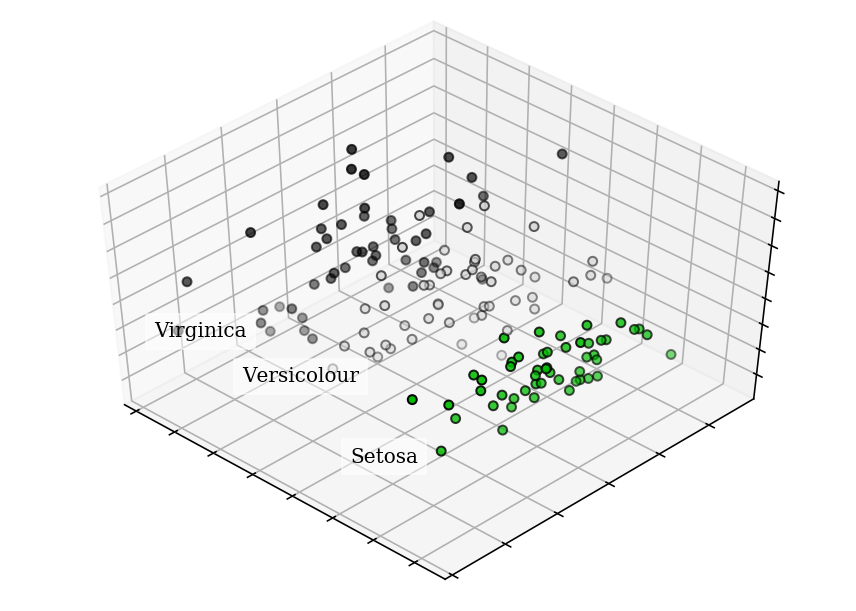

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [5]:
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1)
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

# for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
#     ax.text3D(X[y == label, 0].mean(),
#               X[y == label, 1].mean() + 1.5,
#               X[y == label, 2].mean(), name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# # Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(np.float)
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
#            edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

<Figure size 432x288 with 0 Axes>

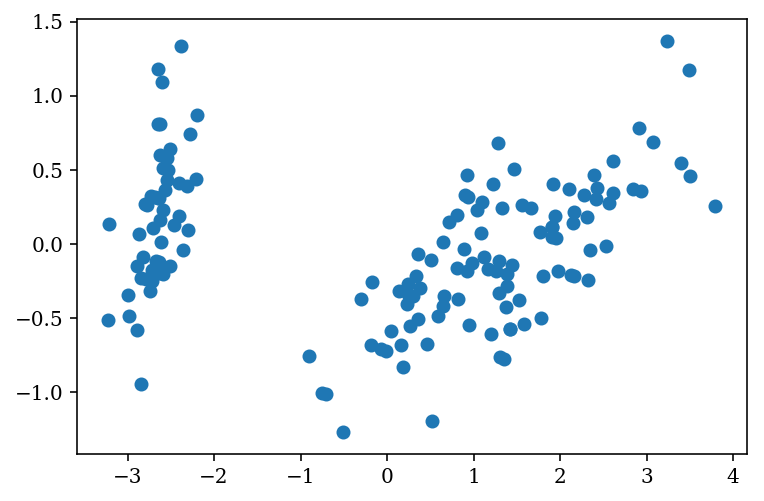

In [6]:
plt.scatter(X[:,0],X[:,1])

## Pytorch  GLRM PCA implementation

In [7]:
A = torch.tensor(iris.data).type(torch.float)
K = 2
gamma = .5

X = torch.randn(A.shape[0],K,requires_grad=True)
Y = torch.randn(K,A.shape[1],requires_grad=True)

In [8]:
ls = nn.MSELoss()
ls(X@Y,A)


tensor(17.9401, grad_fn=<MseLossBackward>)

In [9]:
torch.sum((X@Y - A)**2)/(150*4)

tensor(17.9401, grad_fn=<DivBackward0>)

In [10]:
print(torch.__version__)


1.0.1


In [11]:
import torch
import torch.nn as nn

class NMF(nn.Module):
    def __init__(self, B, N, K):
        super(NMF, self).__init__()
        self.A = nn.Parameter(torch.rand(B, K, requires_grad=True))
        self.S = nn.Parameter(torch.rand(K, N, requires_grad=True))

    def forward(self):
        return torch.matmul(self.A, self.S)

# some data cube Y: B x N and we want to factor it into K components
Y = torch.rand(B,N) 
nmf = NMF(B, N, K)
Y_ = nmf()
loss_fn = nn.MSELoss(reduction='sum')
loss = loss_fn(Y_, Y)
loss.backward()

In [12]:
for param, stepsize in zip(nmf.parameters(), stepsizes):
    param.data = param.data - stepsize * param.grad

NameError: name 'stepsizes' is not defined

In [1]:
pwd

'/home/ianhi/Documents/pytorch-glrm'

In [13]:
k = 3
X = torch.from_numpy(iris.data)

In [14]:
X_mean = torch.mean(X,0)
X = X - X_mean.expand_as(X)

In [16]:
U,S,V = torch.svd(torch.t(X))
C = torch.mm(X,U[:,:k])

RuntimeError: gesdd : Lapack library not found in compile time
 at /tmp/pip-req-build-3sb4rz3f/aten/src/TH/generic/THLapack.cpp:126